**Table of Contents**

**[1. Buy - Sell Plot](#1.-Buy---Sell-Plot)**<br/>
**[2. Two Different Y Axis](#2.-Two-Different-Y-Axis)**

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

---

# 1. Buy - Sell Plot

In [69]:
# 랜덤시드 고정 (모두가 같은 결과를 보기 위함)
np.random.seed(1)

# 주식 가격 (daily_price)의 생성을 위해서 daily_return을 먼저 생성함
# daily_return은 코드생성의 편의를 위해 정규분포를 따른다고 가정하였음 
mu, sigma = 0, 0.02 
daily_return_array = np.random.normal(mu, sigma, 100)

# 위에서 생성한 daily_return을 이용해서 daily_price 생성
daily_price_array = (daily_return_array+1).cumprod()

# 2000년 1월 1일부터 주식가격을 관찰했다고 가정 
date_series = pd.date_range(start='1/1/2000', freq='D', periods=100)

# pd.Series로 만들기
daily_price_series = pd.Series(daily_price_array, index=date_series)

<AxesSubplot:>

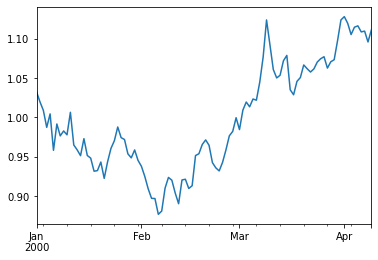

In [70]:
# 주식가격 제대로 생성하였는지 플로팅해보기
daily_price_series.plot()

In [71]:
buy_date_list = daily_price_series.index[[10,50,70]]
sell_date_list = daily_price_series.index[[30,60,95]]

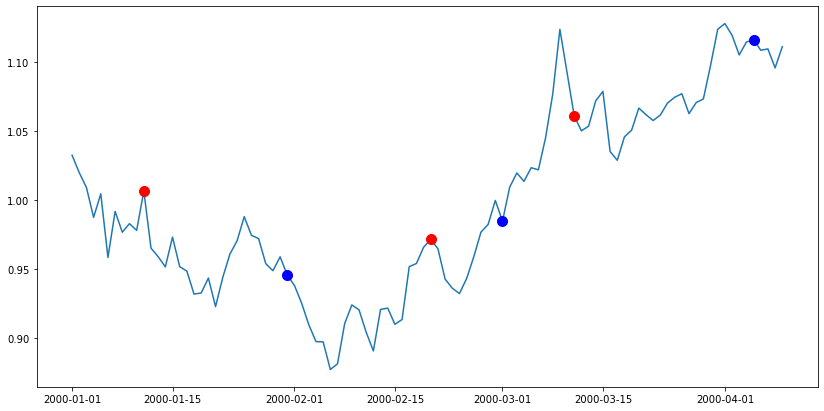

In [74]:
# 플로팅하기
# 산 날은 red, 판 날은 blue로 표시됨.
plt.figure(figsize=(14,7))
plt.plot(daily_price_series)
plt.plot(buy_date_list, daily_price_series.loc[buy_date_list],  '.', markersize=20, color='red')
plt.plot(sell_date_list, daily_price_series.loc[sell_date_list],  '.', markersize=20, color='blue')

---

# 2. Two Different Y Axis

In [55]:
# 두 주식 A,B가 있다고 해보자.
stock_A_initial_price = 10000
stock_B_initial_price = 500

# 주식 가격 (daily_price)의 생성을 위해서 daily_return을 먼저 생성함
# daily_return은 코드생성의 편의를 위해 정규분포를 따른다고 가정하였음 
mu_A, sigma_A = 0, 0.02 
stock_A_return_array = np.random.normal(mu_A, sigma_A, 1000)

mu_B, sigma_B = 0.0001, 0.03
stock_B_return_array = np.random.normal(mu_B, sigma_B, 1000)

In [56]:
# 위에서 생성한 daily_return을 이용해서 daily_price 생성
stock_A_price_array = (stock_A_return_array+1).cumprod() * stock_A_initial_price
stock_B_price_array = (stock_B_return_array+1).cumprod() * stock_B_initial_price

# 2000년 1월 1일부터 주식가격을 관찰했다고 가정 
date_series = pd.date_range(start='1/1/2000', freq='D', periods=1000)

# pd.Series로 만들기
stock_A_price_series = pd.Series(stock_A_price_array, index=date_series)
stock_B_price_series = pd.Series(stock_B_price_array, index=date_series)

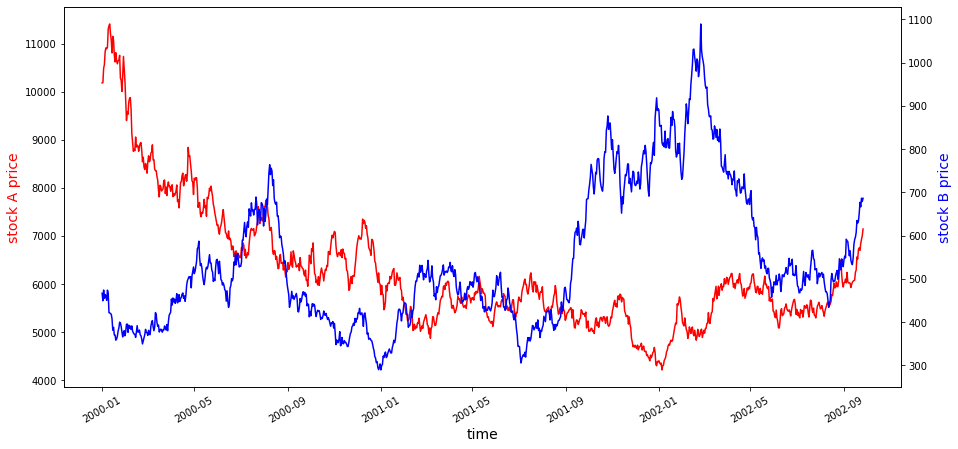

In [59]:
## source: https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/ss

# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(15, 7))
plt.xticks(rotation = 30)

# make a plot
ax.plot(date_series, stock_A_price_series, color="red")
# set x-axis label
ax.set_xlabel("time",fontsize=14)
# set y-axis label
ax.set_ylabel("stock A price",color="red",fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
# ax2.plot(merged_df.index, merged_df['equity_in_BTC'] ,color="blue", alpha= 0.5)
ax2.plot(date_series, stock_B_price_series ,color="blue")

ax2.set_ylabel("stock B price",color="blue", fontsize=14)
plt.show()

---

# 3. Plotting Horizontal and Vertical Lines

In [60]:
# cumulative wealth의 생성을 위해서 daily_return을 먼저 생성함
# daily_return은 코드생성의 편의를 위해 정규분포를 따른다고 가정하였음 
mu, sigma = 0, 0.02 
return_array = np.random.normal(mu, sigma, 1000)

# 위에서 생성한 daily_return을 이용해서 cum_wealth_array 생성
cum_wealth_array = (return_array+1).cumprod()

# 2000년 1월 1일부터 주식가격을 관찰했다고 가정 
date_series = pd.date_range(start='1/1/2000', freq='D', periods=1000)

# pd.Series로 만들기
cum_wealth_series = pd.Series(data = cum_wealth_array, index = date_series)

In [61]:
date_series

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2002-09-17', '2002-09-18', '2002-09-19', '2002-09-20',
               '2002-09-21', '2002-09-22', '2002-09-23', '2002-09-24',
               '2002-09-25', '2002-09-26'],
              dtype='datetime64[ns]', length=1000, freq='D')

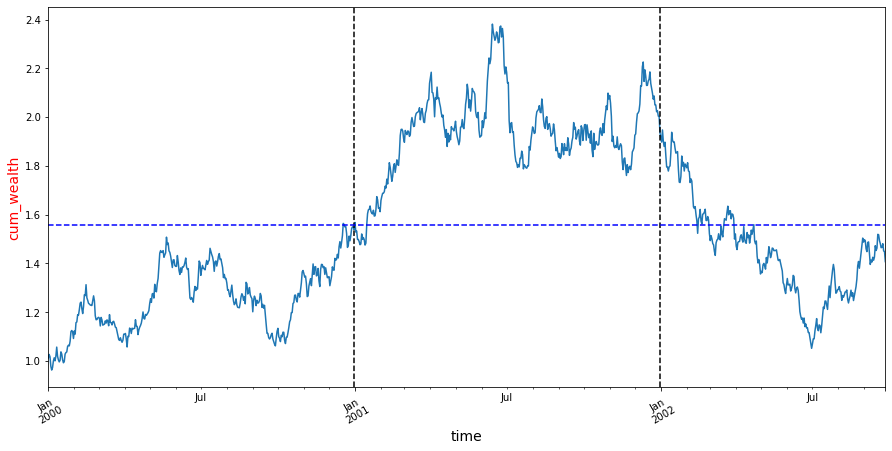

In [75]:
## source: https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/ss


# create figure and axis objects with subplots()
ax = cum_wealth_series.plot(figsize=(15,7))
plt.xticks(rotation = 30)

# make a plot
# set x-axis label
ax.set_xlabel("time",fontsize=14)
# set y-axis label
ax.set_ylabel("cum_wealth",color="red",fontsize=14)

# plotting vertical lines
ax.axvline(x=datetime(2000,12,31,23,59), color='k', linestyle='--')
ax.axvline(x=datetime(2001,12,31,23,59), color='k', linestyle='--')

# plotting horizontal lines
ax.axhline(y=cum_wealth_series.mean(), color='blue', linestyle='--')

---

# 4. Putting a Text on Plots
- 위의 3번 예제에서 이어짐.

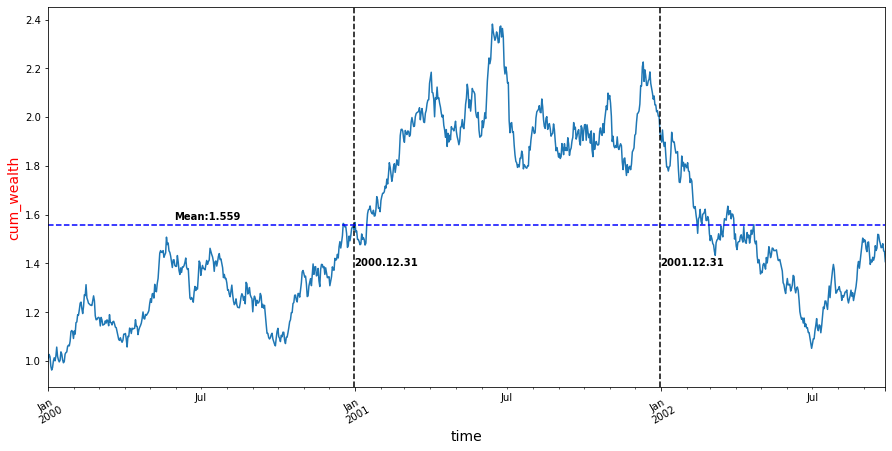

In [82]:
# create figure and axis objects with subplots()
ax = cum_wealth_series.plot(figsize=(15,7))
plt.xticks(rotation = 30)

# make a plot
# set x-axis label
ax.set_xlabel("time",fontsize=14)
# set y-axis label
ax.set_ylabel("cum_wealth",color="red",fontsize=14)

# help source: https://stackoverflow.com/a/52961228/8846998
min_ylim, max_ylim = ax.get_ylim()
ylim_diff = (max_ylim - min_ylim)
min_xlim, max_xlim = ax.get_xlim()
xlim_diff = (max_xlim - min_xlim)

### plotting vertical lines
# 2020년 끝 표시
ax.axvline(x=datetime(2000,12,31,23,59), color='k', linestyle='--')
plt.text(datetime(2000,12,31,23,59), (min_ylim + ylim_diff*0.32), f"2000.12.31", fontsize=10, weight='bold'); 
# 2021년 끝 표시
ax.axvline(x=datetime(2001,12,31,23,59), color='k', linestyle='--')
plt.text(datetime(2001,12,31,23,59), (min_ylim + ylim_diff*0.32), f"2001.12.31", fontsize=10, weight='bold'); 

# plotting horizontal lines
ax.axhline(y=cum_wealth_series.mean(), color='blue', linestyle='--')
plt.text((min_xlim + xlim_diff*0.15), (min_ylim + ylim_diff * 0.44), f"Mean:{cum_wealth_series.mean():.3f}", fontsize=10, weight='bold'); 